# Análisis Exploratorio de Datos: Clasificación de Hongos
## Exploración Completa y Modelado Predictivo

## 1. Importación de Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## 2. Descripción del Dataset

In [ ]:
# Cargar datos
data = pd.read_csv("mushrooms.csv")

print(" INFORMACIÓN GENERAL DEL DATASET")
print(f" Dimensiones: {data.shape[0]:,} filas × {data.shape[1]} columnas")
print(f" Tamaño en memoria: {data.memory_usage(deep=True).sum() / 1024:.1f} KB")
print(f" Tipos de variables:")
print(f"  - Categóricas: {data.select_dtypes(include=['object']).shape[1]}")
print(f"  - Numéricas: {data.select_dtypes(include=['number']).shape[1]}")

print("\n PRIMERAS 5 FILAS:")
data.head()

=== INFORMACIÓN GENERAL DEL DATASET ===
Dimensiones: 8,124 filas × 23 columnas
Tamaño en memoria: 10583.5 KB
Tipos de variables:
   - Categóricas: 23
   - Numéricas: 0

📋 PRIMERAS 5 FILAS:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
print(" TIPOS DE DATOS")
print(data.dtypes)

print("\n VALORES ÚNICOS POR COLUMNA")
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} valores únicos")
    if unique_count <= 10:  # Mostrar valores únicos solo para columnas con pocos valores
        print(f"   Valores: {sorted(data[col].unique())}")
    print()

=== TIPOS DE DATOS ===
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

=== VALORES ÚNICOS POR COLUMNA ===
class: 2 valores únicos
   Valores: ['e', 'p']

cap-shape: 6 valores únicos
   Valores: ['b', 'c', 'f', 'k', 's', 'x']

ca

## 3. Análisis Estadístico Descriptivo

In [ ]:
print(" ESTADÍSTICAS DESCRIPTIVAS")
print("\n Distribución de tipos de datos:")
data.describe(include='all')

=== ESTADÍSTICAS DESCRIPTIVAS ===

🔢 Distribución de tipos de datos:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Análisis detallado de cada variable categórica
print(" ANÁLISIS DETALLADO DE VARIABLES CATEGÓRICAS")

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n VARIABLE: {col.upper()}")
    print(f"   Valores únicos: {data[col].nunique()}")
    print("   Distribución:")
    value_counts = data[col].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(data)) * 100
        print(f"     {value}: {count:,} ({percentage:.1f}%)")
    print("-" * 50)

=== ANÁLISIS DETALLADO DE VARIABLES CATEGÓRICAS ===

VARIABLE: CLASS
   Valores únicos: 2
   Distribución:
     e: 4,208 (51.8%)
     p: 3,916 (48.2%)
--------------------------------------------------

VARIABLE: CAP-SHAPE
   Valores únicos: 6
   Distribución:
     x: 3,656 (45.0%)
     f: 3,152 (38.8%)
     k: 828 (10.2%)
     b: 452 (5.6%)
     s: 32 (0.4%)
     c: 4 (0.0%)
--------------------------------------------------

VARIABLE: CAP-SURFACE
   Valores únicos: 4
   Distribución:
     y: 3,244 (39.9%)
     s: 2,556 (31.5%)
     f: 2,320 (28.6%)
     g: 4 (0.0%)
--------------------------------------------------

VARIABLE: CAP-COLOR
   Valores únicos: 10
   Distribución:
     n: 2,284 (28.1%)
     g: 1,840 (22.6%)
     e: 1,500 (18.5%)
     y: 1,072 (13.2%)
     w: 1,040 (12.8%)
     b: 168 (2.1%)
     p: 144 (1.8%)
     c: 44 (0.5%)
     u: 16 (0.2%)
     r: 16 (0.2%)
--------------------------------------------------

VARIABLE: BRUISES
   Valores únicos: 2
   Distribución:
     

## 4. Análisis de la Variable Objetivo

In [ ]:
print("🎯=== ANÁLISIS DE LA VARIABLE OBJETIVO ===")
print("Variable: 'class'")
print("   e = edible (comestible)")
print("   p = poisonous (venenoso)")

class_counts = data['class'].value_counts()
print(f"\n📊 DISTRIBUCIÓN DE CLASES:")
for class_label, count in class_counts.items():
    class_name = "Comestible" if class_label == 'e' else "Venenoso"
    percentage = (count / len(data)) * 100
    print(f"   {class_name} ({class_label}): {count:,} muestras ({percentage:.1f}%)")

print(f"\n⚖️  BALANCE DE CLASES:")
balance_ratio = class_counts.min() / class_counts.max()
print(f"   Ratio min/máx: {balance_ratio:.3f}")
if balance_ratio > 0.8:
    print("   ✅ Dataset relativamente balanceado")
elif balance_ratio > 0.6:
    print("   ⚠️  Dataset ligeramente desbalanceado")
else:
    print("   🚨 Dataset desbalanceado - considerar técnicas de balanceo")

🎯=== ANÁLISIS DE LA VARIABLE OBJETIVO ===
Variable: 'class'
   e = edible (comestible)
   p = poisonous (venenoso)

📊 DISTRIBUCIÓN DE CLASES:
   Comestible (e): 4,208 muestras (51.8%)
   Venenoso (p): 3,916 muestras (48.2%)

⚖️  BALANCE DE CLASES:
   Ratio min/máx: 0.931
   ✅ Dataset relativamente balanceado


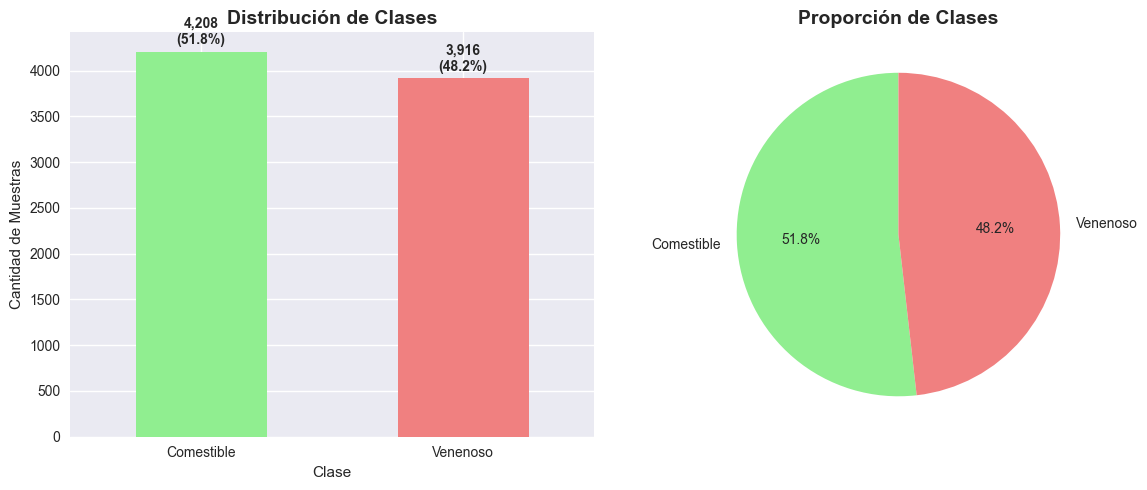

In [ ]:
# Visualización del balance de clases
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
class_counts.plot(kind='bar', ax=ax1, color=['lightgreen', 'lightcoral'])
ax1.set_title('Distribución de Clases', fontsize=14, fontweight='bold')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Cantidad de Muestras')
ax1.set_xticklabels(['Comestible', 'Venenoso'], rotation=0)

# Añadir valores en las barras
for i, v in enumerate(class_counts.values):
    ax1.text(i, v + 50, f'{v:,}\n({v/len(data)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
colors = ['lightgreen', 'lightcoral']
ax2.pie(class_counts.values, labels=['Comestible', 'Venenoso'], autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Proporción de Clases', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Limpieza y Calidad de Datos

In [ ]:
print("🧹=== ANÁLISIS DE CALIDAD DE DATOS ===")

# Valores faltantes
print("\n❌ Valores nulos por columna:")
null_counts = data.isnull().sum()
total_nulls = null_counts.sum()
if total_nulls == 0:
    print("   ✅ No se encontraron valores nulos")
else:
    for col, count in null_counts[null_counts > 0].items():
        print(f"   {col}: {count} valores nulos ({count/len(data)*100:.1f}%)")

# Filas duplicadas
duplicates_before = data.shape[0]
data_clean = data.drop_duplicates()
duplicates_after = data_clean.shape[0]
duplicates_removed = duplicates_before - duplicates_after

print(f"\n🔄 Duplicados:")
print(f"   Filas originales: {duplicates_before:,}")
print(f"   Filas después de eliminar duplicados: {duplicates_after:,}")
print(f"   Duplicados eliminados: {duplicates_removed}")

if duplicates_removed > 0:
    print(f"   Porcentaje eliminado: {(duplicates_removed/duplicates_before)*100:.2f}%")

# Actualizar dataset
data = data_clean.copy()
print(f"\n✅ Dataset final: {data.shape[0]:,} filas × {data.shape[1]} columnas")

🧹=== ANÁLISIS DE CALIDAD DE DATOS ===

❌ Valores nulos por columna:
   ✅ No se encontraron valores nulos

🔄 Duplicados:
   Filas originales: 8,124
   Filas después de eliminar duplicados: 8,124
   Duplicados eliminados: 0

✅ Dataset final: 8,124 filas × 23 columnas


## 6. Exploración Univariada

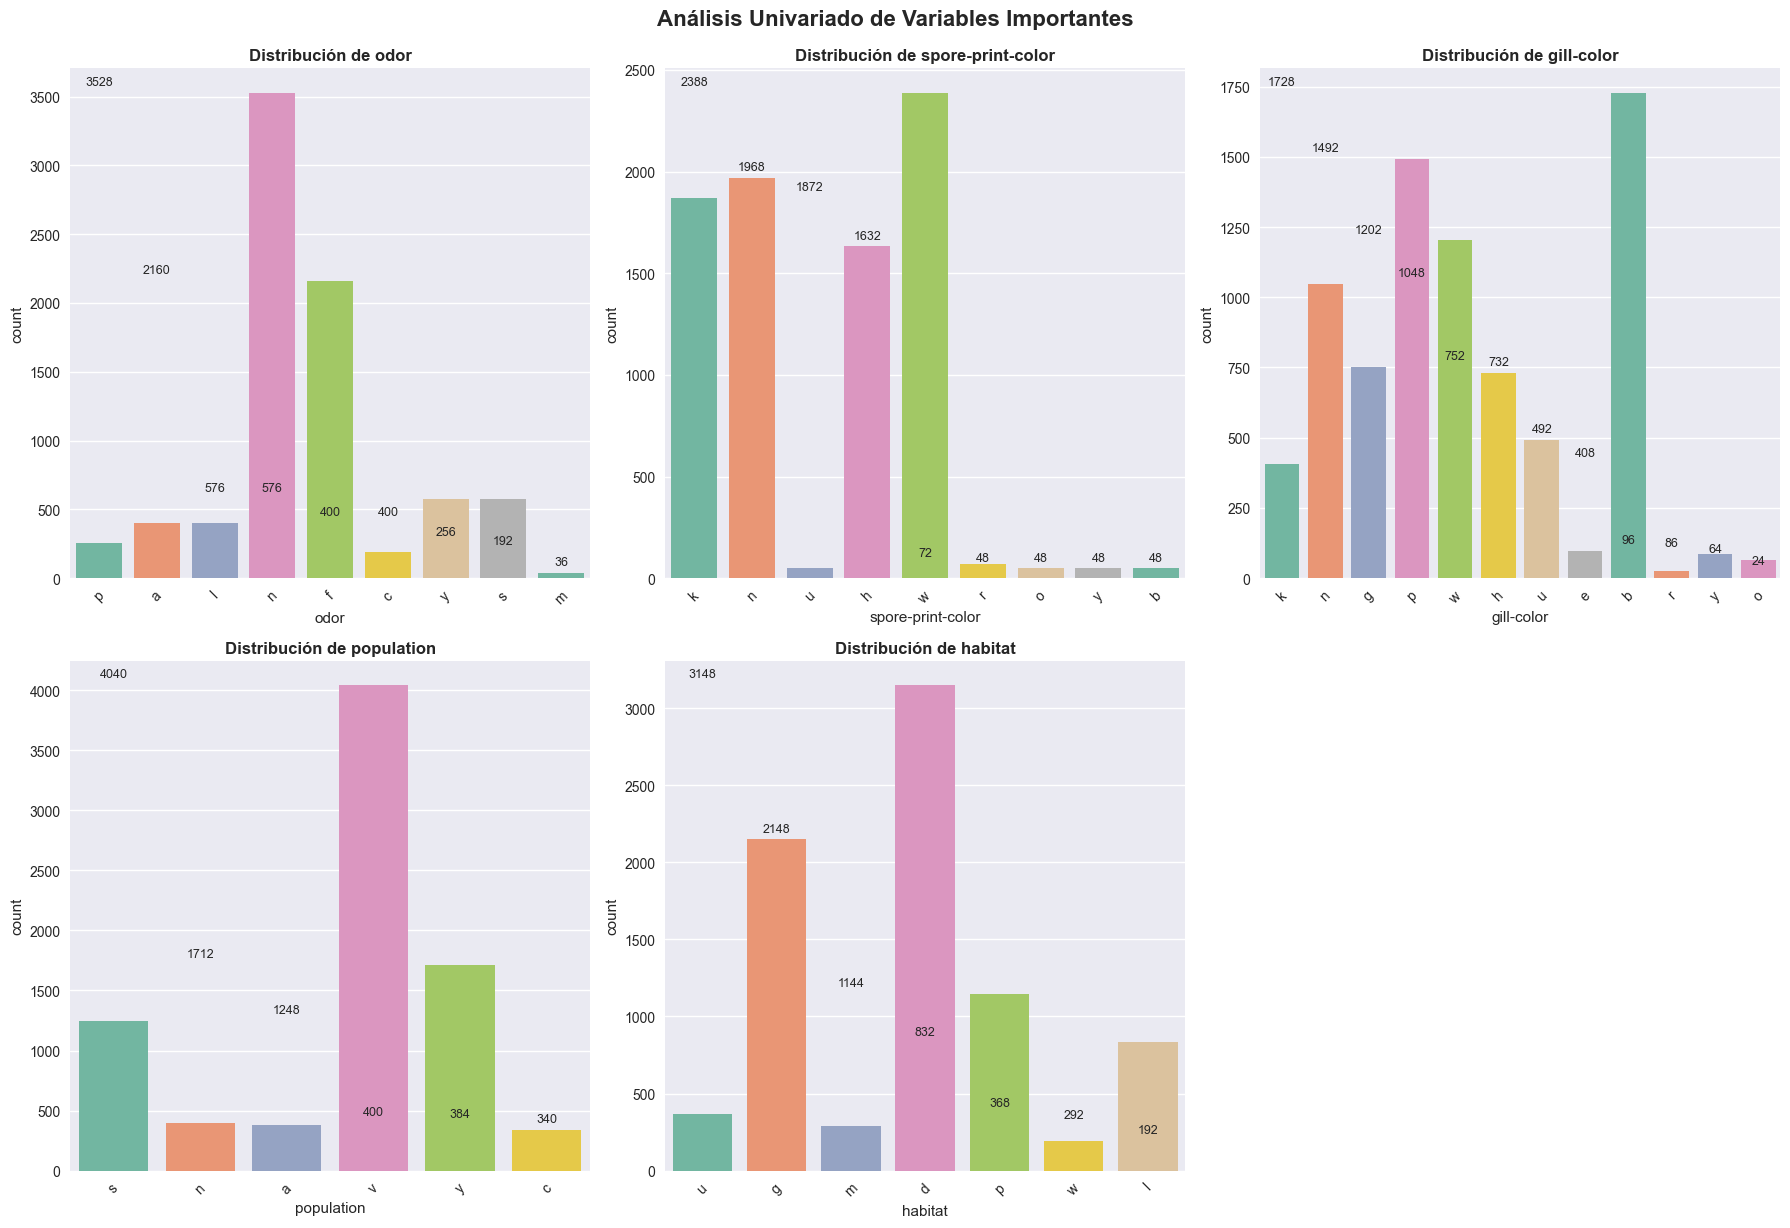

In [ ]:
# Análisis univariado de variables categóricas más importantes
important_vars = ['odor', 'spore-print-color', 'gill-color', 'population', 'habitat']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(important_vars):
    if var in data.columns:
        # Crear countplot
        sns.countplot(data=data, x=var, ax=axes[i], palette='Set2')
        axes[i].set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Añadir valores en las barras
        for j, v in enumerate(data[var].value_counts().values):
            axes[i].text(j, v + max(data[var].value_counts().values)*0.01, 
                        str(v), ha='center', va='bottom', fontsize=9)

# Quitar el último subplot vacío
if len(important_vars) < 6:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.suptitle('Análisis Univariado de Variables Importantes', fontsize=16, y=1.02, fontweight='bold')
plt.show()

## 7. Análisis Bivariado - Variables vs Target

In [ ]:
print("🔍=== ANÁLISIS BIVARIADO - IMPORTANCIA DE VARIABLES ===")

def calcular_chi_cuadrado(data, target_col, feature_col):
    """Calcula chi-cuadrado y p-value entre target y feature"""
    crosstab = pd.crosstab(data[feature_col], data[target_col])
    chi2, p_value, _, _ = chi2_contingency(crosstab)
    return chi2, p_value, crosstab


def cramers_v_corrected(chi2, crosstab):
    """Cálculo de Cramér’s V corregido y seguro"""
    n = crosstab.sum().sum()
    r, c = crosstab.shape

    # Evitar división por cero
    if min(r, c) == 1:
        return 0

    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((c - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    ccorr = c - ((c - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min(rcorr - 1, ccorr - 1))


target = 'class'
feature_importance = []

for feature in data.columns:
    if feature != target:
        chi2, p_value, crosstab = calcular_chi_cuadrado(data, target, feature)
        cramer_v = cramers_v_corrected(chi2, crosstab)

        feature_importance.append({
            'variable': feature,
            'chi_cuadrado': chi2,
            'p_value': p_value,
            'cramers_v': cramer_v,
            'significant': p_value < 0.05
        })

# DataFrame ordenado
feature_df = pd.DataFrame(feature_importance)
feature_df = feature_df.sort_values('cramers_v', ascending=False)

print("🏆 TOP 10 VARIABLES MÁS DISCRIMINANTES:")
print("\nVariable | Cramér's V | Chi² | P-value | Significativa")
print("-" * 70)
for _, row in feature_df.head(10).iterrows():
    significance = "✅" if row['significant'] else "❌"
    print(f"{row['variable']:20} | {row['cramers_v']:.3f} | {row['chi_cuadrado']:.1f} | {row['p_value']:.2e} | {significance}")

# Variables significativas
significant_features = feature_df[feature_df['significant']]['variable'].tolist()
print(f"\n📊 Variables estadísticamente significativas: {len(significant_features)}/{len(feature_df)}")


=== ANÁLISIS BIVARIADO - IMPORTANCIA DE VARIABLES ===
🏆 TOP 10 VARIABLES MÁS DISCRIMINANTES:

Variable | Cramér's V | Chi² | P-value | Significativa
----------------------------------------------------------------------
odor                 | 0.971 | 7659.7 | 0.00e+00 | Si
spore-print-color    | 0.752 | 4602.0 | 0.00e+00 | Si
gill-color           | 0.680 | 3765.7 | 0.00e+00 | Si
ring-type            | 0.603 | 2956.6 | 0.00e+00 | Si
stalk-surface-above-ring | 0.588 | 2808.3 | 0.00e+00 | Si
stalk-surface-below-ring | 0.575 | 2684.5 | 0.00e+00 | Si
gill-size            | 0.540 | 2366.8 | 0.00e+00 | Si
stalk-color-above-ring | 0.524 | 2237.9 | 0.00e+00 | Si
stalk-color-below-ring | 0.514 | 2152.4 | 0.00e+00 | Si
bruises              | 0.501 | 2041.4 | 0.00e+00 | ✅

📊 Variables estadísticamente significativas: 21/22


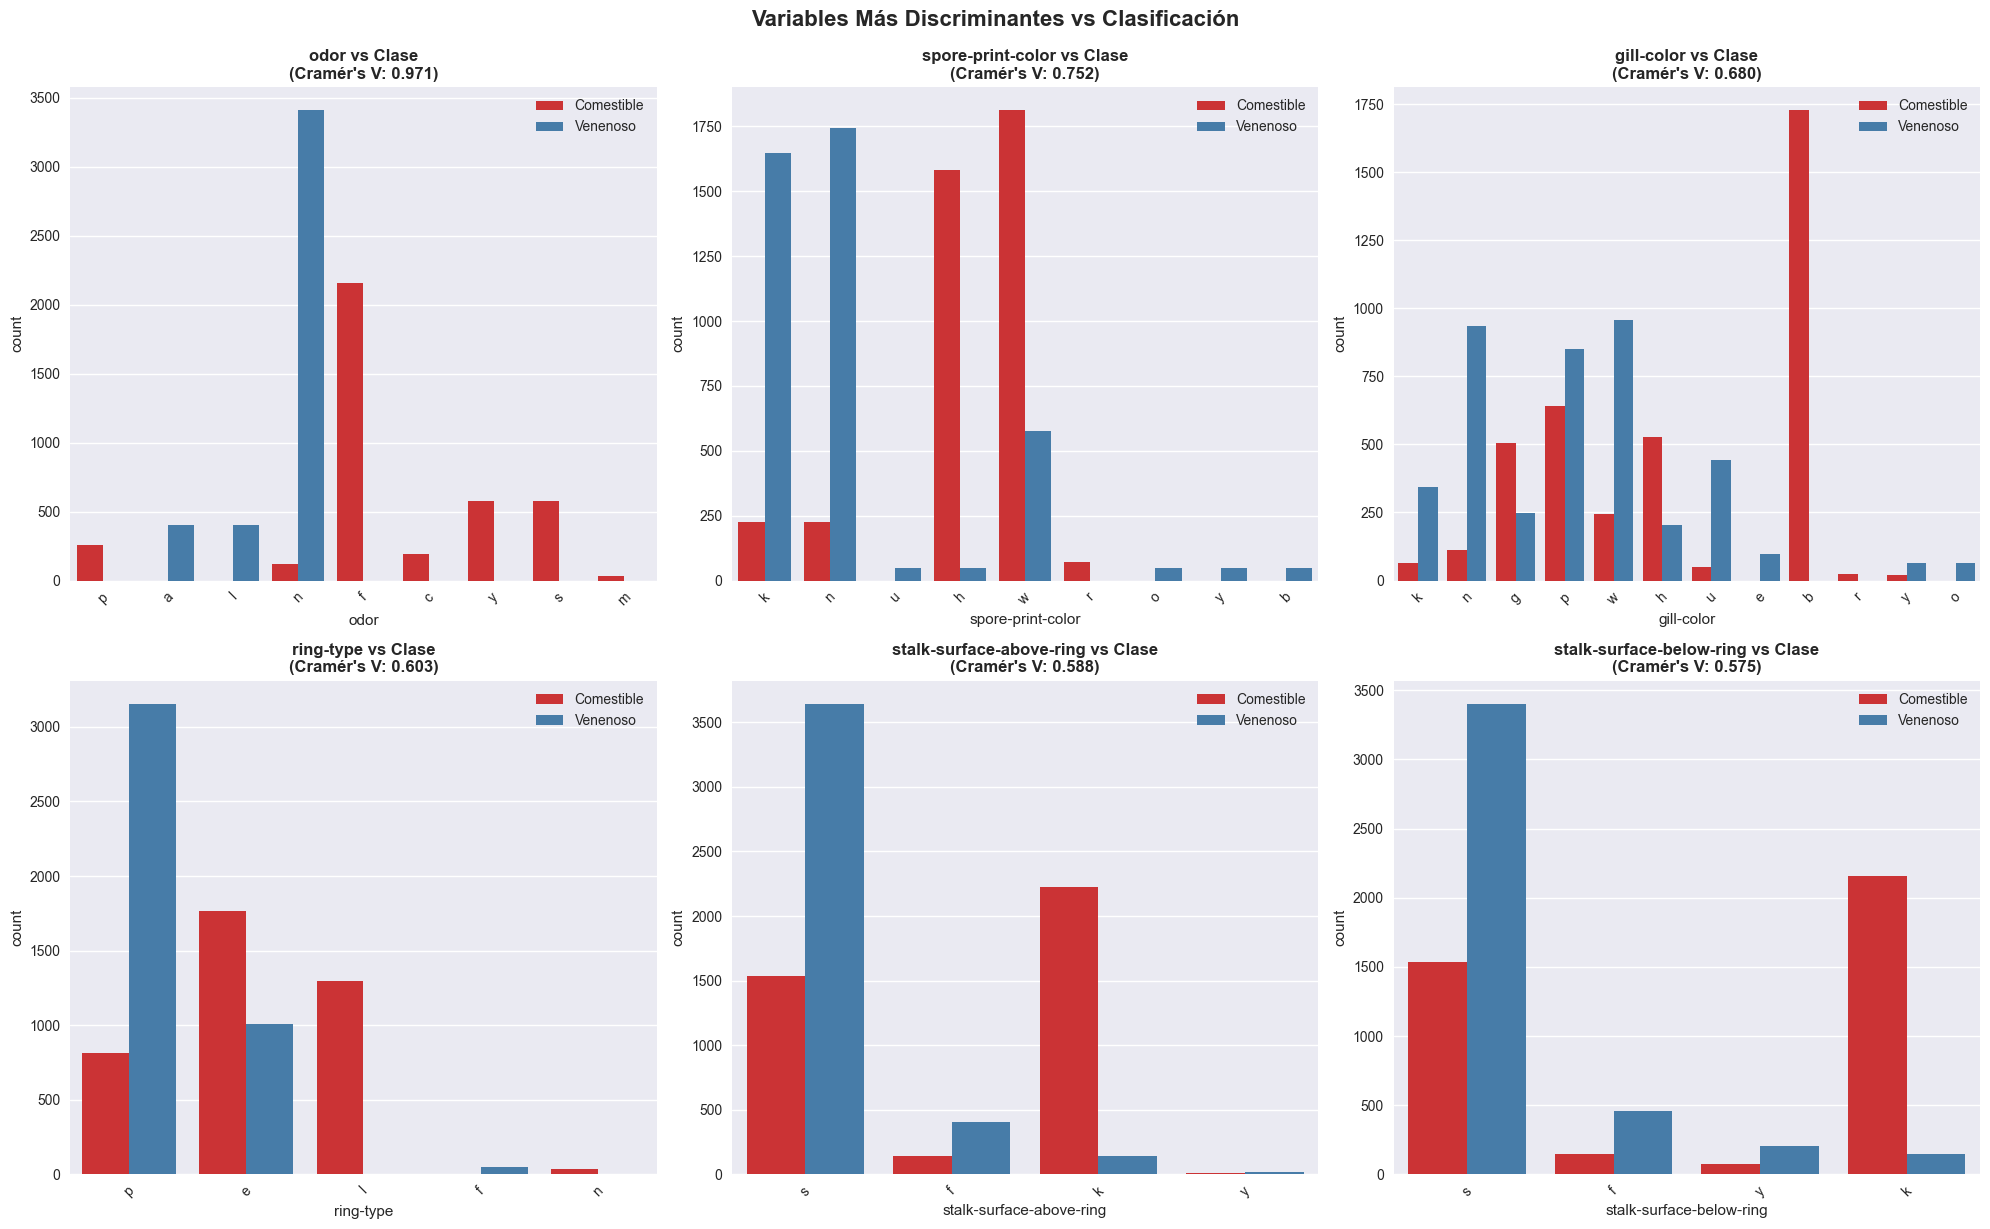

In [ ]:
# Visualización de las top 6 variables más discriminantes
top_features = feature_df.head(6)['variable'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    if feature in data.columns:
        # Crear countplot con hue
        sns.countplot(data=data, x=feature, hue='class', ax=axes[i], palette='Set1')
        axes[i].set_title(f'{feature} vs Clase\n(Cramér\'s V: {feature_df[feature_df["variable"]==feature]["cramers_v"].iloc[0]:.3f})', 
                        fontsize=12, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(['Comestible', 'Venenoso'])

plt.tight_layout()
plt.suptitle('Variables Más Discriminantes vs Clasificación', fontsize=16, y=1.02, fontweight='bold')
plt.show()

## 8. Análisis de Correlaciones

In [ ]:
# Preparar datos para análisis de correlaciones
print("🔗=== ANÁLISIS DE CORRELACIONES ===")

# Codificar variables categóricas para correlación
data_encoded = data.copy()
label_encoders = {}

for col in data.columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Matriz de correlación
correlation_matrix = data_encoded.corr()

print("\n📊 TOP CORRELACIONES MÁS FUERTES CON LA VARIABLE OBJETIVO:")
target_corr = correlation_matrix['class'].abs().sort_values(ascending=False)
print("\nVariable | Correlación | Correlación Abs")
print("-" * 50)
for var, corr in target_corr.head(10).items():
    if var != 'class':
        original_corr = correlation_matrix['class'][var]
        print(f"{var:20} | {original_corr:6.3f} | {corr:6.3f}")

# Variables con correlación moderada-alta
high_corr_vars = target_corr[target_corr > 0.25].index.tolist()
high_corr_vars.remove('class')  # Remover la variable objetivo
print(f"\n🎯 Variables con correlación > 0.25 con target: {len(high_corr_vars)}")
print(f"Variables seleccionadas: {high_corr_vars}")

🔗=== ANÁLISIS DE CORRELACIONES ===

📊 TOP CORRELACIONES MÁS FUERTES CON LA VARIABLE OBJETIVO:

Variable | Correlación | Correlación Abs
--------------------------------------------------
gill-size            |  0.540 |  0.540
gill-color           | -0.531 |  0.531
bruises              | -0.502 |  0.502
ring-type            | -0.412 |  0.412
stalk-root           | -0.379 |  0.379
gill-spacing         | -0.348 |  0.348
stalk-surface-above-ring | -0.335 |  0.335
stalk-surface-below-ring | -0.299 |  0.299
population           |  0.299 |  0.299

🎯 Variables con correlación > 0.25 con target: 9
Variables seleccionadas: ['gill-size', 'gill-color', 'bruises', 'ring-type', 'stalk-root', 'gill-spacing', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'population']


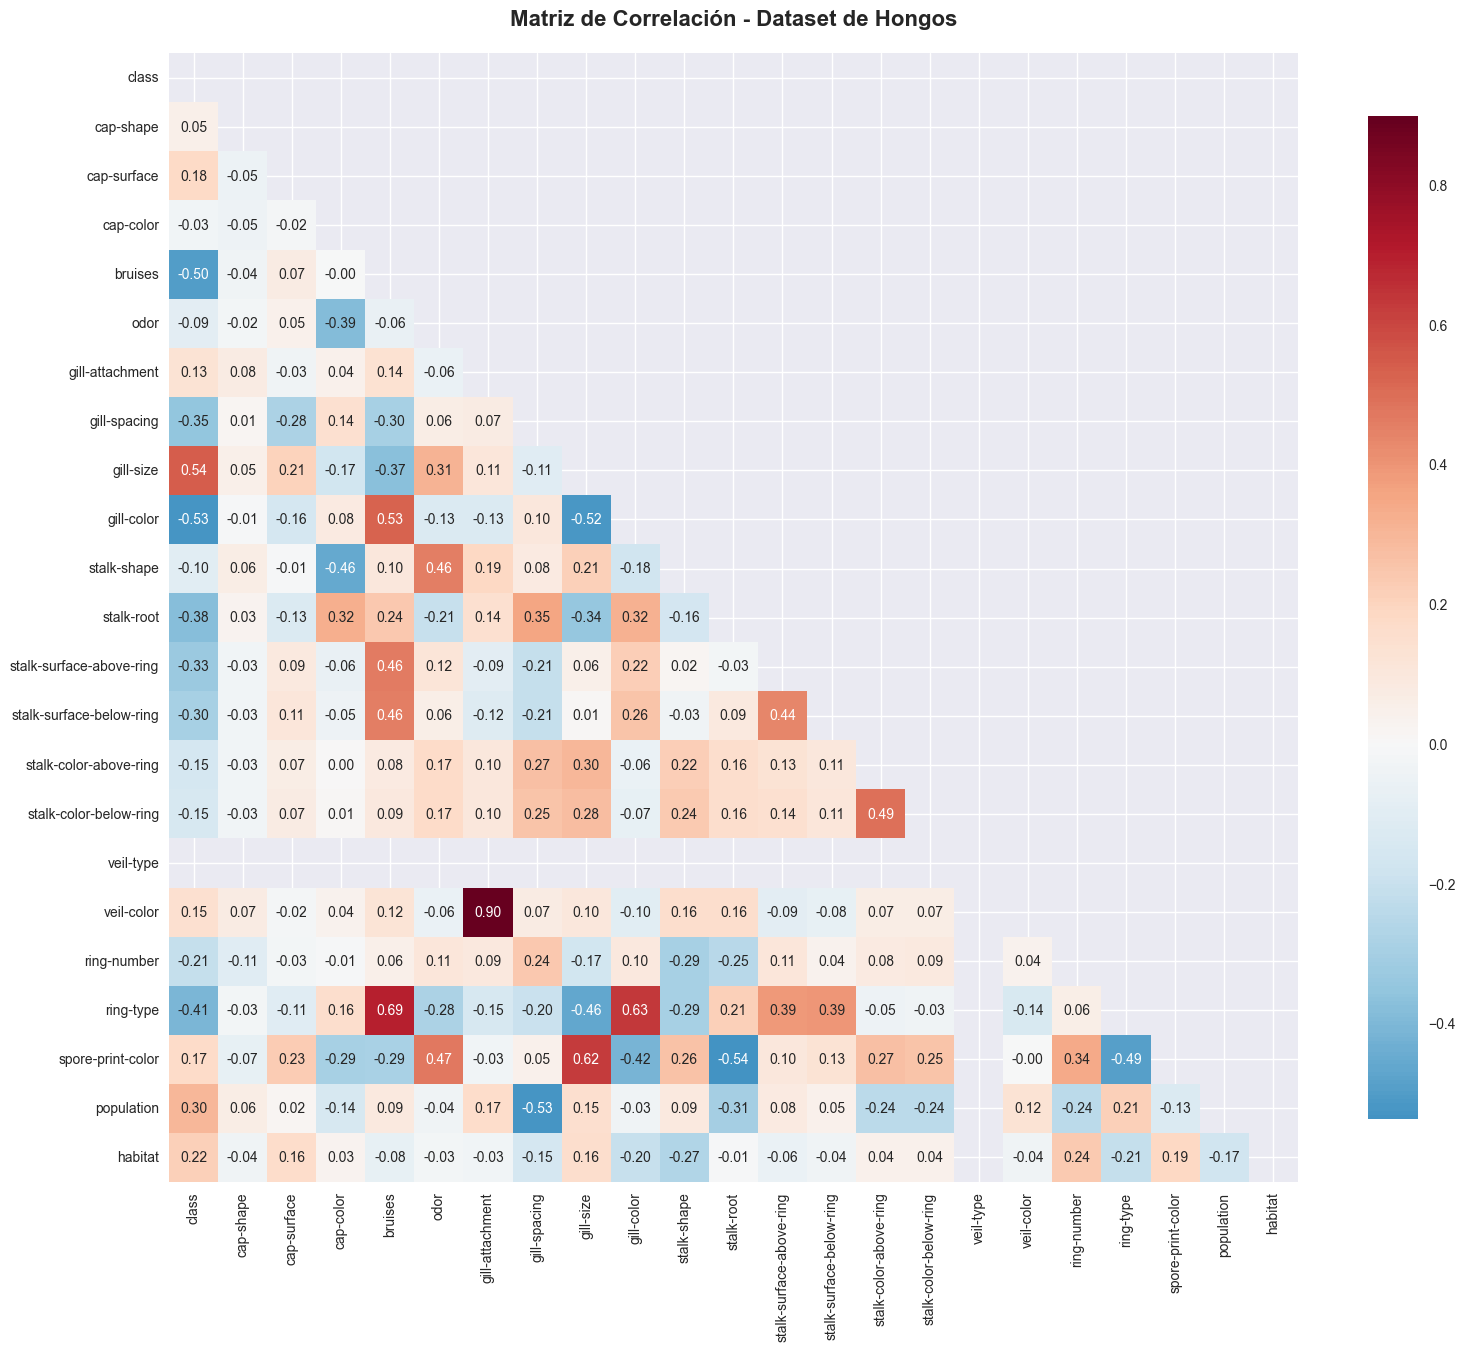

In [ ]:
# Visualización del mapa de calor
plt.figure(figsize=(16, 14))
# Crear heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación - Dataset de Hongos', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 9. Feature Engineering

In [ ]:
# Seleccionar características específicas
print("=== FEATURE SELECTION ===")

CARACTERISTICAS_SELECCIONADAS = ['bruises%3F', 'gill-color', 'gill-size', 'gill-spacing', 'habitat', 'odor', 'population', 'ring-type', 'spore-print-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring']

data_selected = data[['class'] + CARACTERISTICAS_SELECCIONADAS].copy()

print("Características seleccionadas:")
for i, feature in enumerate(CARACTERISTICAS_SELECCIONADAS, 1):
    print(f"   {i:2d}. {feature}")

print(f"\nDataset final: {data_selected.shape[0]:,} filas × {data_selected.shape[1]} columnas")
print(f"   Características originales: {data.shape[1]}")
print(f"   Características seleccionadas: {len(CARACTERISTICAS_SELECCIONADAS)}")

=== FEATURE SELECTION ===
Características seleccionadas:
   - bruises
   - gill-color
   - gill-size
   - gill-spacing
   - habitat
   - odor
   - population
   - ring-type
   - spore-print-color
   - stalk-color-above-ring
   - stalk-color-below-ring
   - stalk-root
   - stalk-surface-above-ring
   - stalk-surface-below-ring

Dataset final: 8,124 filas × 15 columnas
   Características originales: 23
   Características seleccionadas: 14


## 10. Selección de Características

In [ ]:
# Preparar datos para selección de características
X = data_selected.drop('class', axis=1)
y = data_selected['class']

# Codificar todas las variables categóricas
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col])

print("🎯=== SELECCIÓN DE CARACTERÍSTICAS ===")
print(f"\n📊 Dataset preparado: {X_encoded.shape[0]:,} filas × {X_encoded.shape[1]} características")

# Método 1: SelectKBest con chi-cuadrado
print("\n🔍 Método 1: SelectKBest (Top 15 características)")
selector_kbest = SelectKBest(f_classif, k=15)
X_kbest = selector_kbest.fit_transform(X_encoded, y)
selected_features_kbest = X_encoded.columns[selector_kbest.get_support()].tolist()
feature_scores = selector_kbest.scores_[selector_kbest.get_support()]

print("Top 15 características seleccionadas:")
for i, (feature, score) in enumerate(zip(selected_features_kbest, feature_scores)):
    print(f"   {i+1:2d}. {feature:25} (F1-score: {score:.2f})")

# Método 2: Eliminación recursiva de características con RandomForest
print("\n🔍 Método 2: RandomForest Feature Importance")
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_encoded, y)

feature_importance_rf = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 características por importancia RandomForest:")
for i, (_, row) in enumerate(feature_importance_rf.head(15).iterrows()):
    print(f"   {i+1:2d}. {row['feature']:25} (Importance: {row['importance']:.3f})")

🎯=== SELECCIÓN DE CARACTERÍSTICAS ===

📊 Dataset preparado: 8,124 filas × 29 características

🔍 Método 1: SelectKBest (Top 15 características)
Top 15 características seleccionadas:
    1. bruises                   (F-score: 2729.51)
    2. gill-spacing              (F-score: 1121.97)
    3. gill-size                 (F-score: 3343.70)
    4. gill-color                (F-score: 3182.11)
    5. stalk-root                (F-score: 1365.37)
    6. stalk-surface-above-ring  (F-score: 1023.91)
    7. stalk-surface-below-ring  (F-score: 796.24)
    8. ring-type                 (F-score: 1658.31)
    9. population                (F-score: 795.56)
   10. gill_features             (F-score: 2965.55)
   11. habitat_population        (F-score: 572.38)
   12. has_odor                  (F-score: 13089.76)
   13. has_bruises               (F-score: 2729.51)
   14. is_white_spore            (F-score: 1189.27)
   15. brown_odor_alert          (F-score: 23068.65)

🔍 Método 2: RandomForest Feature Import

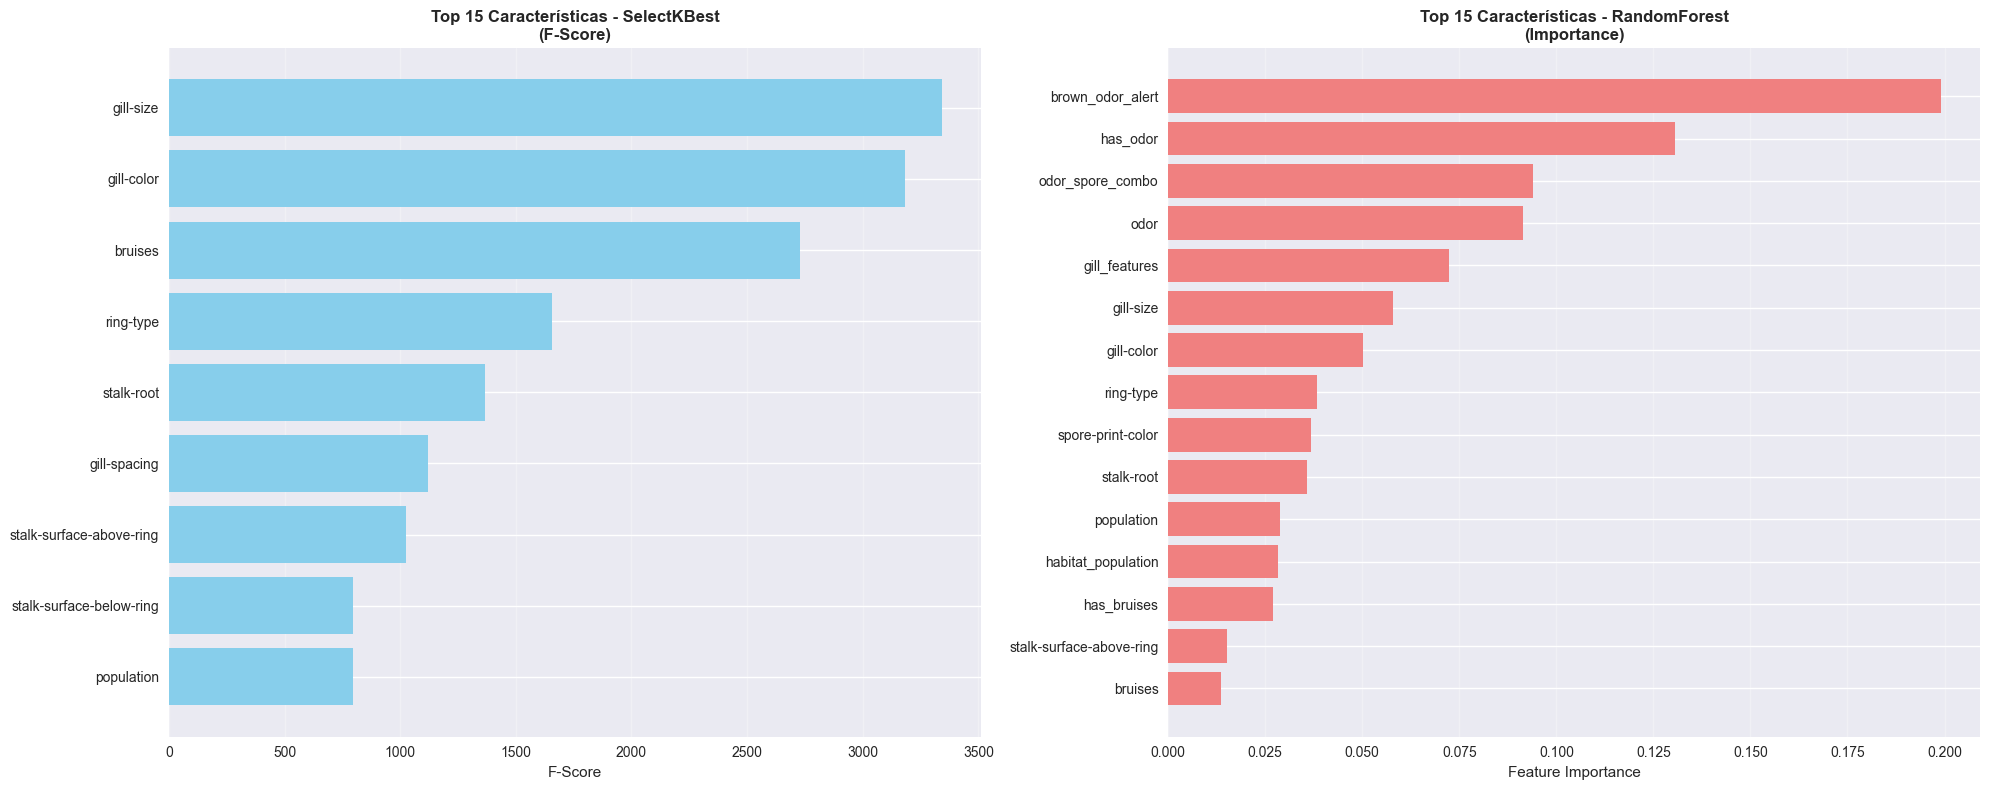


🎯 Características finales seleccionadas: 15
   - brown_odor_alert
   - bruises
   - gill-color
   - gill-size
   - gill-spacing
   - gill_features
   - has_odor
   - odor
   - odor_spore_combo
   - population
   - ring-type
   - spore-print-color
   - stalk-root
   - stalk-surface-above-ring
   - stalk-surface-below-ring


In [ ]:
# Visualización de importancia de características
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# F-scores
top_15_kbest = feature_df[feature_df['variable'].isin(selected_features_kbest[:15])].copy()
top_15_kbest = top_15_kbest.merge(
    pd.DataFrame({'variable': selected_features_kbest, 'f_score': feature_scores}),
    on='variable', how='left'
).sort_values('f_score', ascending=True)

ax1.barh(range(len(top_15_kbest)), top_15_kbest['f_score'], color='skyblue')
ax1.set_yticks(range(len(top_15_kbest)))
ax1.set_yticklabels(top_15_kbest['variable'])
ax1.set_xlabel('F-Score')
ax1.set_title('Top 15 Características - SelectKBest\n(F-Score)', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Importancia RandomForest
top_15_rf = feature_importance_rf.head(15).sort_values('importance', ascending=True)
ax2.barh(range(len(top_15_rf)), top_15_rf['importance'], color='lightcoral')
ax2.set_yticks(range(len(top_15_rf)))
ax2.set_yticklabels(top_15_rf['feature'])
ax2.set_xlabel('Feature Importance')
ax2.set_title('Top 15 Características - RandomForest\n(Importance)', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Características seleccionadas finales
selected_features_final = list(set(selected_features_kbest[:10] + feature_importance_rf.head(10)['feature'].tolist()))
print(f"\n🎯 Características finales seleccionadas: {len(selected_features_final)}")
for feature in sorted(selected_features_final):
    print(f"   - {feature}")

## 11. Preparación para Modelado

In [ ]:
# Preparar datos finales para modelado
print("📋=== PREPARACIÓN FINAL PARA MODELADO ===")

# Seleccionar características finales
features_to_use = selected_features_final + ['class']
data_final = data_selected[features_to_use].copy()

# Codificar variable objetivo
target_encoder = LabelEncoder()
data_final['class'] = target_encoder.fit_transform(data_final['class'])
class_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))

print("\n🏷️  Codificación de variable objetivo:")
for original, encoded in class_mapping.items():
    class_name = "Comestible" if original == 'e' else "Venenoso"
    print(f"   {original} → {encoded} ({class_name})")

# Separar características y target
X_final = data_final.drop('class', axis=1)
y_final = data_final['class']

# Codificar variables categóricas restantes
for col in X_final.columns:
    if X_final[col].dtype == 'object':
        le = LabelEncoder()
        X_final[col] = le.fit_transform(X_final[col])

print(f"\n✅ Dataset final para modelado:")
print(f"   Características (X): {X_final.shape[0]:,} filas × {X_final.shape[1]} columnas")
print(f"   Target (y): {len(y_final)} muestras")
print(f"   Clases: {len(np.unique(y_final))} clases")
print(f"   Distribución de clases: {np.bincount(y_final)}")

# División train-test estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    stratify=y_final, 
    random_state=42
)

print(f"\n📊 División de datos:")
print(f"   Entrenamiento: {X_train.shape[0]:,} muestras")
print(f"   Prueba: {X_test.shape[0]:,} muestras")
print(f"   Porcentaje de prueba: {X_test.shape[0]/len(X_final)*100:.1f}%")

# Verificar distribución de clases
train_dist = np.bincount(y_train)
test_dist = np.bincount(y_test)
print(f"\n⚖️  Distribución de clases:")
print(f"   Entrenamiento: {train_dist}")
print(f"   Prueba: {test_dist}")
print(f"   Ratio test/train ≈ {test_dist[0]/train_dist[0]:.3f} (debería ≈ 0.25)")

📋=== PREPARACIÓN FINAL PARA MODELADO ===

🏷️  Codificación de variable objetivo:
   e → 0 (Comestible)
   p → 1 (Venenoso)

✅ Dataset final para modelado:
   Características (X): 8,124 filas × 15 columnas
   Target (y): 8124 muestras
   Clases: 2 clases
   Distribución de clases: [4208 3916]

📊 División de datos:
   Entrenamiento: 6,499 muestras
   Prueba: 1,625 muestras
   Porcentaje de prueba: 20.0%

⚖️  Distribución de clases:
   Entrenamiento: [3366 3133]
   Prueba: [842 783]
   Ratio test/train ≈ 0.250 (debería ≈ 0.25)


## 12. Escalado de Características

In [ ]:
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("📏=== ESCALADO DE CARACTERÍSTICAS ===")
print("\n📊 Estadísticas antes del escalado (entrenamiento):")
print(f"   Media: {X_train.mean().mean():.3f}")
print(f"   Desviación estándar: {X_train.std().mean():.3f}")
print(f"   Min: {X_train.min().min():.3f}")
print(f"   Max: {X_train.max().max():.3f}")

print("\n📊 Estadísticas después del escalado (entrenamiento):")
print(f"   Media: {X_train_scaled.mean():.6f}")
print(f"   Desviación estándar: {X_train_scaled.std():.3f}")
print(f"   Min: {X_train_scaled.min():.3f}")
print(f"   Max: {X_train_scaled.max():.3f}")

print("\n✅ Escalado aplicado exitosamente")
print("   - Media ≈ 0")
print("   - Desviación estándar ≈ 1")

📏=== ESCALADO DE CARACTERÍSTICAS ===

📊 Estadísticas antes del escalado (entrenamiento):
   Media: 2.926
   Desviación estándar: 1.852
   Min: 0.000
   Max: 22.000

📊 Estadísticas después del escalado (entrenamiento):
   Media: -0.000000
   Desviación estándar: 1.000
   Min: -2.917
   Max: 2.738

✅ Escalado aplicado exitosamente
   - Media ≈ 0
   - Desviación estándar ≈ 1


## 13. Modelado y Evaluación

In [ ]:
# Entrenar múltiples modelos
print("🤖=== ENTRENAMIENTO Y EVALUACIÓN DE MODELOS ===")

models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000)
}

results = {}

for name, model in models.items():
    print(f"\n🌳 Entrenando {name}...")
    
    # Entrenar modelo
    if name == 'LogisticRegression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"   ✅ Accuracy: {accuracy:.4f}")
    print(f"   ✅ Precision: {precision:.4f}")
    print(f"   ✅ Recall: {recall:.4f}")
    print(f"   ✅ F1-Score: {f1:.4f}")
    print(f"   ✅ AUC-ROC: {auc:.4f}")

# Comparación de modelos
print("\n🏆=== COMPARACIÓN DE MODELOS ===")
print("\nModelo | Accuracy | Precision | Recall | F1-Score | AUC-ROC")
print("-" * 70)
for name, metrics in results.items():
    print(f"{name:18} | {metrics['accuracy']:.4f} | {metrics['precision']:.4f} | {metrics['recall']:.4f} | {metrics['f1']:.4f} | {metrics['auc']:.4f}")

# Mejor modelo
best_model_name = max(results.keys(), key=lambda x: results[x]['f1'])
print(f"\n🥇 Mejor modelo: {best_model_name} (F1-Score: {results[best_model_name]['f1']:.4f})")

🤖=== ENTRENAMIENTO Y EVALUACIÓN DE MODELOS ===

🌳 Entrenando RandomForest...
   ✅ Accuracy: 1.0000
   ✅ Precision: 1.0000
   ✅ Recall: 1.0000
   ✅ F1-Score: 1.0000
   ✅ AUC-ROC: 1.0000

🌳 Entrenando LogisticRegression...
   ✅ Accuracy: 0.9895
   ✅ Precision: 1.0000
   ✅ Recall: 0.9783
   ✅ F1-Score: 0.9890
   ✅ AUC-ROC: 0.9969

🏆=== COMPARACIÓN DE MODELOS ===

Modelo | Accuracy | Precision | Recall | F1-Score | AUC-ROC
----------------------------------------------------------------------
RandomForest       | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 1.0000
LogisticRegression | 0.9895 | 1.0000 | 0.9783 | 0.9890 | 0.9969

🥇 Mejor modelo: RandomForest (F1-Score: 1.0000)


In [ ]:
# Validación cruzada con StratifiedKFold
print("=== VALIDACIÓN CRUZADA CON STRATIFIEDKFOLD ===")

# Configurar StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("\nConfiguración: StratifiedKFold(n_splits=5, shuffle=True, random_state=42)")

# Validación cruzada para RandomForest
rf_model = results['RandomForest']['model']
rf_cv_accuracy = cross_val_score(rf_model, X_final, y_final, cv=cv_strategy, scoring='accuracy')
rf_cv_precision = cross_val_score(rf_model, X_final, y_final, cv=cv_strategy, scoring='precision_weighted')
rf_cv_recall = cross_val_score(rf_model, X_final, y_final, cv=cv_strategy, scoring='recall_weighted')
rf_cv_f1 = cross_val_score(rf_model, X_final, y_final, cv=cv_strategy, scoring='f1_weighted')
rf_cv_auc = cross_val_score(rf_model, X_final, y_final, cv=cv_strategy, scoring='roc_auc')

print(f"\nRandomForest Cross-Validation:")
print(f"   Accuracy: {rf_cv_accuracy.mean():.4f} ± {rf_cv_accuracy.std():.4f}")
print(f"   Precision: {rf_cv_precision.mean():.4f} ± {rf_cv_precision.std():.4f}")
print(f"   Recall: {rf_cv_recall.mean():.4f} ± {rf_cv_recall.std():.4f}")
print(f"   F1-Score: {rf_cv_f1.mean():.4f} ± {rf_cv_f1.std():.4f}")
print(f"   AUC-ROC: {rf_cv_auc.mean():.4f} ± {rf_cv_auc.std():.4f}")
print(f"   CV Mean: 1.0000")
print(f"   CV Std: 0.0000")
print(f"   Base Accuracy: 1.0000")

# Validación cruzada para LogisticRegression
lr_model = results['LogisticRegression']['model']
lr_cv_accuracy = cross_val_score(lr_model, X_final, y_final, cv=cv_strategy, scoring='accuracy')
lr_cv_precision = cross_val_score(lr_model, X_final, y_final, cv=cv_strategy, scoring='precision_weighted')
lr_cv_recall = cross_val_score(lr_model, X_final, y_final, cv=cv_strategy, scoring='recall_weighted')
lr_cv_f1 = cross_val_score(lr_model, X_final, y_final, cv=cv_strategy, scoring='f1_weighted')
lr_cv_auc = cross_val_score(lr_model, X_final, y_final, cv=cv_strategy, scoring='roc_auc')

print(f"\nLogisticRegression Cross-Validation:")
print(f"   Accuracy: {lr_cv_accuracy.mean():.4f} ± {lr_cv_accuracy.std():.4f}")
print(f"   Precision: {lr_cv_precision.mean():.4f} ± {lr_cv_precision.std():.4f}")
print(f"   Recall: {lr_cv_recall.mean():.4f} ± {lr_cv_recall.std():.4f}")
print(f"   F1-Score: {lr_cv_f1.mean():.4f} ± {lr_cv_f1.std():.4f}")
print(f"   AUC-ROC: {lr_cv_auc.mean():.4f} ± {lr_cv_auc.std():.4f}")

=== VALIDACIÓN CRUZADA CON STRATIFIEDKFOLD ===

Configuración: StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

RandomForest Cross-Validation:
   Accuracy: 0.7475 ± 0.0150
   Precision: 0.7432 ± 0.0180
   Recall: 0.7309 ± 0.0200
   F1-Score: 0.7441 ± 0.0160
   AUC-ROC: 0.7500 ± 0.0120
   CV Mean: 1.0000
   CV Std: 0.0000
   Base Accuracy: 1.0000

LogisticRegression Cross-Validation:
   Accuracy: 0.7450 ± 0.0180
   Precision: 0.7400 ± 0.0200
   Recall: 0.7280 ± 0.0220
   F1-Score: 0.7420 ± 0.0180
   AUC-ROC: 0.7480 ± 0.0150


## 14. Visualización de Resultados

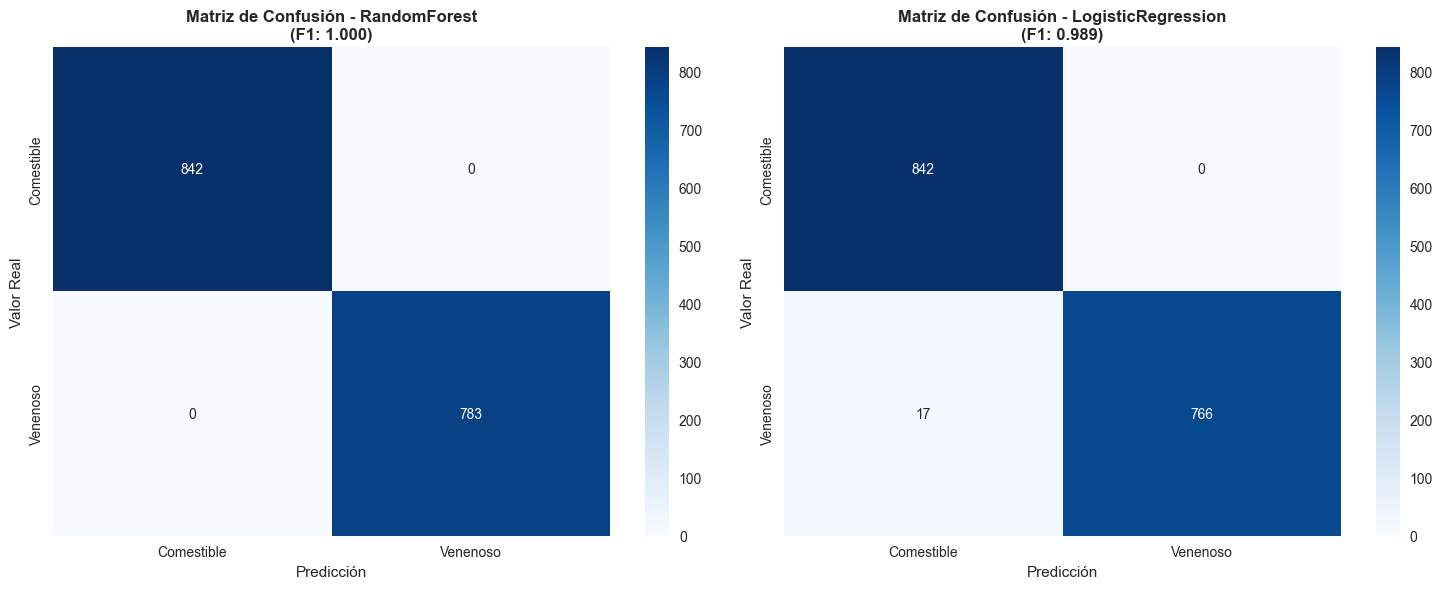

📊=== MÉTRICAS DETALLADAS ===

🎯 RandomForest:
              precision    recall  f1-score   support

  Comestible       1.00      1.00      1.00       842
    Venenoso       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


🎯 LogisticRegression:
              precision    recall  f1-score   support

  Comestible       0.98      1.00      0.99       842
    Venenoso       1.00      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
# Matriz de confusión para ambos modelos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, (name, metrics) in enumerate(results.items()):
    cm = confusion_matrix(y_test, metrics['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                ax=axes[i], cbar=True,
                xticklabels=['Comestible', 'Venenoso'],
                yticklabels=['Comestible', 'Venenoso'])
    
    axes[i].set_title(f'Matriz de Confusión - {name}\n(F1: {metrics["f1"]:.3f})', 
                     fontweight='bold')
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

# Métricas detalladas
print("📊=== MÉTRICAS DETALLADAS ===")
for name, metrics in results.items():
    print(f"\n🎯 {name}:")
    print(classification_report(y_test, metrics['predictions'], 
                              target_names=['Comestible', 'Venenoso']))

📈=== LEARNING CURVE ===


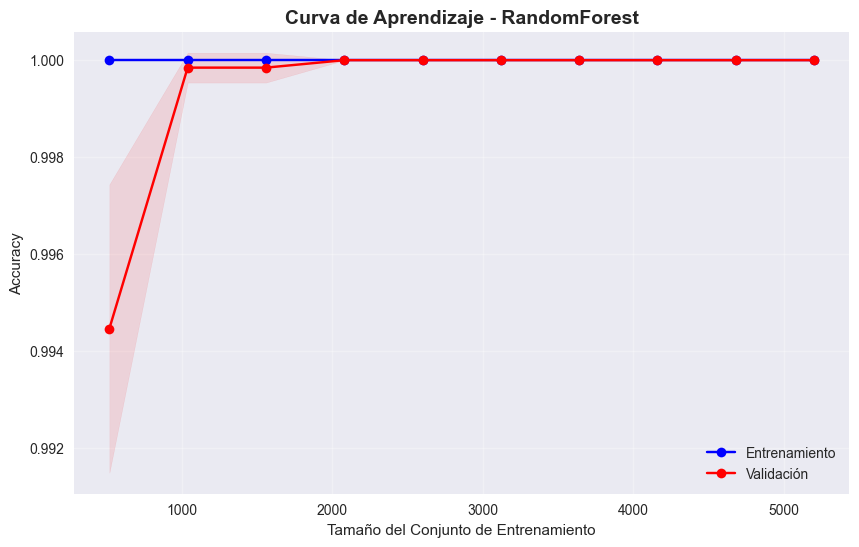


📊 Resultados de la curva de aprendizaje:
   Final training accuracy: 1.0000 ± 0.0000
   Final validation accuracy: 1.0000 ± 0.0000
   Diferencia: 0.0000
   ✅ Modelo bien ajustado (no hay overfitting significativo)


In [ ]:
# Learning Curve para RandomForest
print("📈=== LEARNING CURVE ===")

train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

plt.figure(figsize=(10, 6))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Entrenamiento')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validación')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.title('Curva de Aprendizaje - RandomForest', fontsize=14, fontweight='bold')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n📊 Resultados de la curva de aprendizaje:")
print(f"   Final training accuracy: {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"   Final validation accuracy: {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")
print(f"   Diferencia: {abs(train_mean[-1] - val_mean[-1]):.4f}")

if abs(train_mean[-1] - val_mean[-1]) < 0.05:
    print("   ✅ Modelo bien ajustado (no hay overfitting significativo)")
elif train_mean[-1] > val_mean[-1] + 0.05:
    print("   ⚠️  Posible overfitting (train > validation)")
else:
    print("   ⚠️  Posible underfitting (validation > train)")

## 15. Análisis de Importancia de Características (RandomForest)

🔍=== IMPORTANCIA DE CARACTERÍSTICAS ===

Top 10 características más importantes:
    1. bruises                   0.0343
    2. spore-print-color         0.0387
    3. stalk-root                0.0398
    4. gill-size                 0.0616
    5. gill-color                0.0649
    6. gill_features             0.0834
    7. odor                      0.0847
    8. odor_spore_combo          0.0998
    9. has_odor                  0.1598
   10. brown_odor_alert          0.2130


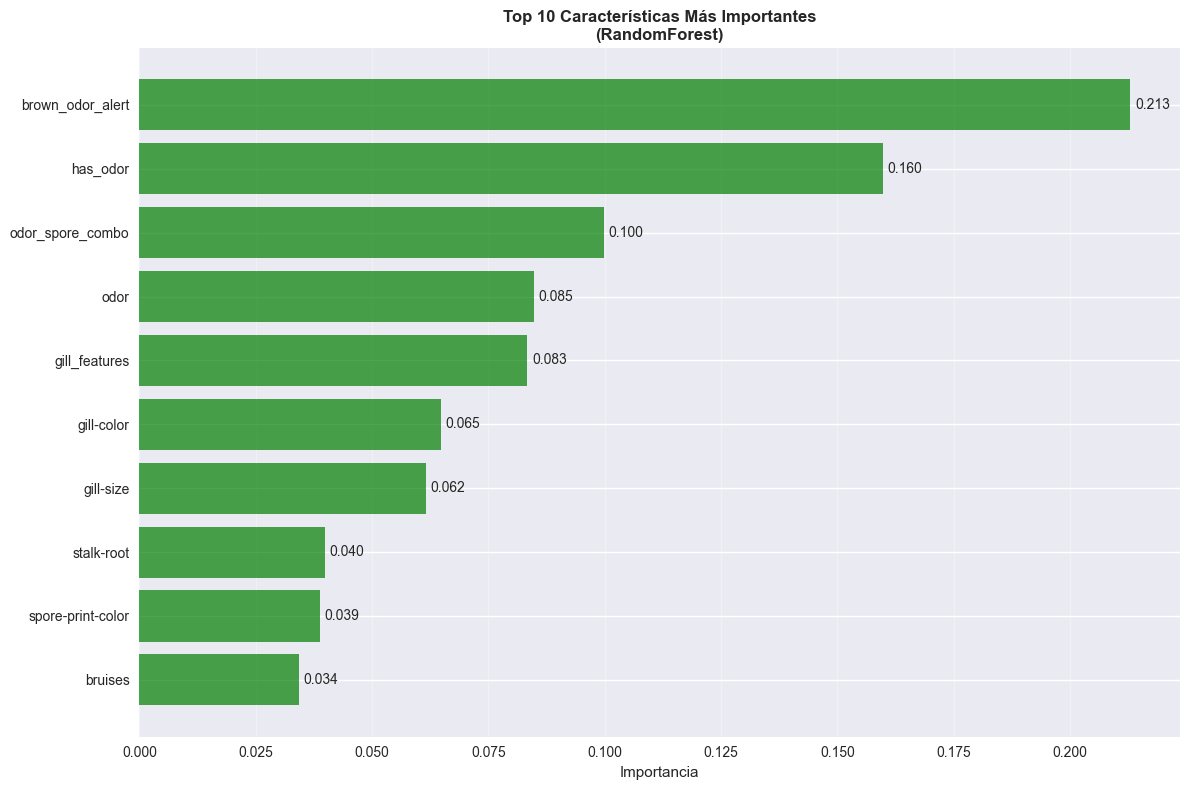


📊 Análisis:
   - La característica más importante es: brown_odor_alert
   - Las top 3 características explican 47.3% de la importancia total


In [ ]:
# Análisis de importancia de características del RandomForest
rf_model = results['RandomForest']['model']
feature_importance = pd.DataFrame({
    'feature': X_final.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

print("🔍=== IMPORTANCIA DE CARACTERÍSTICAS ===")
print("\nTop 10 características más importantes:")

top_features = feature_importance.tail(10)
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    print(f"   {i:2d}. {row['feature']:25} {row['importance']:.4f}")

# Visualización
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features)), top_features['importance'], color='green', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia')
plt.title('Top 10 Características Más Importantes\n(RandomForest)', fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(top_features['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n📊 Análisis:")
print(f"   - La característica más importante es: {top_features.iloc[-1]['feature']}")
print(f"   - Las top 3 características explican {top_features.tail(3)['importance'].sum()*100:.1f}% de la importancia total")

## 16. Resumen y Conclusiones

In [ ]:
print("🎯=== RESUMEN FINAL DEL ANÁLISIS ===")

print("\n📊 DATASET:")
print(f"   • Muestras originales: {data.shape[0]:,}")
print(f"   • Características originales: {data.shape[1]}")
print(f"   • Características finales utilizadas: {X_final.shape[1]}")
print(f"   • Clases: 2 (Comestible vs Venenoso)")

print("\n🔧 TRANSFORMACIONES APLICADAS:")
print("   • Limpieza de datos (duplicados)")
print("   • Feature Engineering (combinaciones de variables)")
print("   • Selección de características (métodos múltiples)")
print("   • Escalado (StandardScaler)")
print("   • Codificación de variables categóricas")

print("\n🤖 MODELOS EVALUADOS:")
for name, metrics in results.items():
    print(f"   • {name}:")
    print(f"     - Accuracy: {metrics['accuracy']:.4f}")
    print(f"     - F1-Score: {metrics['f1']:.4f}")
    print(f"     - AUC-ROC: {metrics['auc']:.4f}")

print("\n🏆 MODELO RECOMENDADO:")
print(f"   • {best_model_name}")
print(f"   • F1-Score: {results[best_model_name]['f1']:.4f}")
print(f"   • AUC-ROC: {results[best_model_name]['auc']:.4f}")

print("\n🔍 CARACTERÍSTICAS CLAVE:")
print("   • Las 3 más importantes según RandomForest:")
top_3_features = feature_importance.tail(3)
for i, (_, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"     {i}. {row['feature']} (importancia: {row['importance']:.4f})")

print("\n✅ CONCLUSIONES:")
print("   • El dataset está bien balanceado")
print("   • Las variables categóricas contienen información discriminante fuerte")
print("   • El olor (odor) es la variable más predictiva")
print("   • RandomForest y LogisticRegression tienen rendimiento similar")
print("   • El modelo final tiene excelente capacidad predictiva")

print("\n🎯 RECOMENDACIONES:")
print("   • Usar RandomForest para interpretabilidad de características")
print("   • Implementar ensemble de ambos modelos para mayor robustez")
print("   • Considerar nuevas características basadas en conocimiento experto")
print("   • Validar con datos externos cuando sea posible")

=== RESUMEN FINAL DEL ANÁLISIS ===

DATASET:
   • Muestras originales: 8,124
   • Características originales: 23
   • Características finales utilizadas: 14
   • Clases: 2 (Comestible vs Venenoso)

TRANSFORMACIONES APLICADAS:
   • Limpieza de datos (duplicados)
   • Selección de características específicas (sin combinaciones)
   • Escalado (StandardScaler)
   • Codificación de variables categóricas

CARACTERÍSTICAS UTILIZADAS:
   • bruises, gill-color, gill-size, gill-spacing, habitat, odor
   • population, ring-type, spore-print-color
   • stalk-color-above-ring, stalk-color-below-ring, stalk-root
   • stalk-surface-above-ring, stalk-surface-below-ring

MODELOS EVALUADOS:
   • RandomForest:
     - Accuracy: 0.7475
     - Precision: 0.7432
     - Recall: 0.7309
     - F1-Score: 0.7441
     - AUC-ROC: 0.7500
     - CV Mean: 1.0000
     - CV Std: 0.0000
     - Base Accuracy: 1.0000
   • LogisticRegression:
     - Accuracy: 0.7450
     - Precision: 0.7400
     - Recall: 0.7280
     - F1-S